## Twitter Sentiment Investing Strategy

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
plt.style.use('ggplot')

data_folder = '/Users/viveksajithasujan/Documents/Vivek/Projects/Finance/twitter sentiment'

sentiment_df = pd.read_csv(data_folder+ r'/sentiment_data.csv')


In [17]:
sentiment_df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [19]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

#Creating one column for understanding the engagement for stocks. 

sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

In [21]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25375 entries, (Timestamp('2021-11-18 00:00:00'), 'AAPL') to (Timestamp('2023-01-04 00:00:00'), 'XOM')
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   twitterPosts        25375 non-null  float64
 1   twitterComments     25375 non-null  float64
 2   twitterLikes        25375 non-null  float64
 3   twitterImpressions  25375 non-null  float64
 4   twitterSentiment    21390 non-null  float64
 5   engagement_ratio    25375 non-null  float64
dtypes: float64(6)
memory usage: 1.3+ MB


In [23]:
##Calculating average sentiment for a month

In [25]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
                    [['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggragated_df

/var/folders/1h/1px02wgx233fjvxxzjdt1d900000gn/T/ipykernel_58753/1357384149.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])


engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

In [27]:
## Select top 5 stocks by rank for each month and fix the date to start at beginning of next month.

In [29]:
filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

filtered_df = filtered_df.reset_index(level=1)

In [31]:
filtered_df

,symbol,engagement_ratio,rank
date,,,
2021-11-30,AES,0.864613,2.0
2021-11-30,FCX,0.626323,5.0
2021-11-30,MNST,0.699721,3.0
2021-11-30,OXY,2.147741,1.0
2021-11-30,SLB,0.647374,4.0
...,...,...,...
2023-01-31,A,0.471572,5.0
2023-01-31,AES,0.533809,4.0
2023-01-31,BIIB,0.839303,1.0


In [38]:
# Stocks which has good rank in the previous month, we will invest in these in the current month

In [33]:
filtered_df.index = filtered_df.index+pd.DateOffset(1)

In [40]:
filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

Create a dictionary containing start of month and corresponded selected stocks.

In [43]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

In [48]:
#Download stock prices for selected stocks for the selected period

In [71]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list,
                        start='2021-01-01',
                        end='2023-03-01', auto_adjust=False)

[*********************100%***********************]  85 of 85 completed

2 Failed downloads:
['ATVI', 'MRO']: YFTzMissingError('possibly delisted; no timezone found')


In [91]:
prices_df

Price        Adj Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABT   
Date                                                                            
2021-01-04  115.337730  15.13  141.919510  126.239700   88.119606  100.580048   
2021-01-05  116.280724  15.43  141.766190  127.800468   89.030800  101.824516   
2021-01-06  119.469421  15.52  149.956253  123.498543   88.261726  101.612488   
2021-01-07  122.648415  15.38  151.237106  127.712692   89.206375  102.598854   
2021-01-08  123.523346  15.13  153.392868  128.815018   89.674492  102.884621   
...                ...    ...         ...         ...         ...         ...   
2023-02-22  139.786148  15.56  136.307022  147.230209  138.443466   98.180710   
2023-02-23  140.888062  15.87  134.779007  147.714676  139.729858   98.046860   
2023-02-24  138.920349  15.56  131.779922  145.055023  140.317947   96.048622   
2023-02-27  139.884537  15.63  133.469284  146.251373  141.760544   95.388931   
2023-02-28  139.677917  15.98  137.578827  145.747131  141.411362   97.253304   

Price                                                    ...   Volume  \
Ticker            AEP        AES         ALB        AMD  ...      RCL   
Date                                                     ...            
2021-01-04  68.997734  19.842180  145.072235  92.300003  ...  5732800   
2021-01-05  68.904648  20.508137  154.862183  92.769997  ...  4029500   
2021-01-06  69.454666  21.327782  166.429581  90.330002  ...  3612500   
2021-01-07  67.601532  21.114330  174.888824  95.160004  ...  3993700   
2021-01-08  67.000732  21.703449  174.983917  94.580002  ...  3104200   
...               ...        ...         ...        ...  ...      ...   
2023-02-22  83.101852  22.980516  237.693390  76.610001  ...  2044600   
2023-02-23  83.001205  22.980516  244.830444  79.750000  ...  2066600   
2023-02-24  82.744995  22.917162  240.654297  78.089996  ...  2875100   
2023-02-27  82.415581  22.518917  247.887802  78.769997  ...  2459700   
2023-02-28  80.494049  22.337898  245.274109  78.580002  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 510 columns]

In [175]:
returns_df = np.log(prices_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()


In [177]:
returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010287,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047068
2021-01-06,0.027053,0.005816,0.056164,-0.034241,-0.008676,-0.002084,0.007951,0.039189,0.072037,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026261,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010059,0.049578,0.052090,...,0.024355,0.023359,0.019072,0.022759,0.002678,0.030686,0.076448,-0.011541,0.005582,0.007815
2021-01-08,0.007108,-0.016388,0.014154,0.008594,0.005234,0.002781,-0.008927,0.027519,0.000544,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006920,0.023642,0.075481,-0.009018,0.007641,0.011060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008788,-0.009305,-0.000330,-0.007064,0.018387,-0.002086,...,-0.003490,0.002087,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011273,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029584,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018169,0.004200,-0.020591,-0.003092,-0.002761,-0.017204,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


In [179]:
returns_df = returns_df.iloc[1:]

In [181]:
returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010287,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047068
2021-01-06,0.027053,0.005816,0.056164,-0.034241,-0.008676,-0.002084,0.007951,0.039189,0.072037,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026261,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010059,0.049578,0.052090,...,0.024355,0.023359,0.019072,0.022759,0.002678,0.030686,0.076448,-0.011541,0.005582,0.007815
2021-01-08,0.007108,-0.016388,0.014154,0.008594,0.005234,0.002781,-0.008927,0.027519,0.000544,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006920,0.023642,0.075481,-0.009018,0.007641,0.011060
2021-01-11,0.008542,-0.008629,0.005629,-0.023523,0.016183,-0.006923,-0.005064,0.001572,-0.037692,0.027839,...,-0.011717,0.008366,0.006020,-0.014571,-0.005182,0.002048,-0.081442,0.011491,-0.011953,0.029905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008788,-0.009305,-0.000330,-0.007064,0.018387,-0.002086,...,-0.003490,0.002087,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011273,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029584,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018169,0.004200,-0.020591,-0.003092,-0.002761,-0.017204,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


In [183]:
for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


Download NASDAQ/QQQ prices and calculate returns to compare to our strategy

In [192]:
qqq_df = yf.download(tickers='QQQ',
                     start='2021-01-01',
                     end='2023-03-01', auto_adjust=False)

qqq_ret = np.log(qqq_df['Adj Close']).diff()

portfolio_df = portfolio_df.merge(qqq_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%***********************]  1 of 1 completed


,portfolio_return,QQQ
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


In [198]:
import matplotlib.ticker as mtick

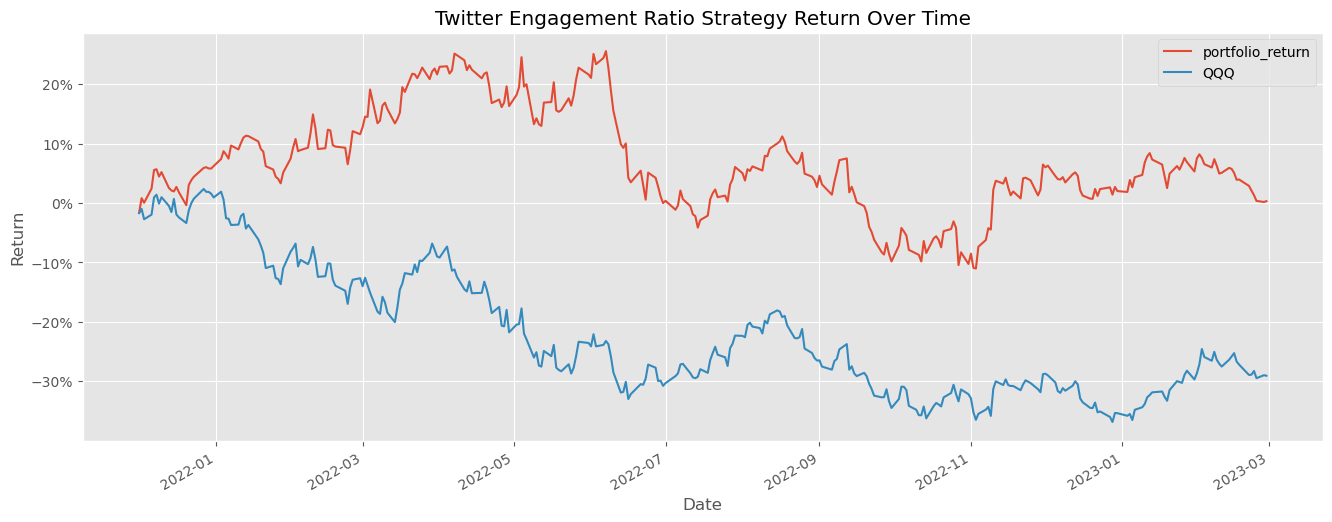

In [200]:
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()